In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
                                                            postgres_port, postgres_db))

df = pd.read_sql_query('select * from heartdisease', con=engine)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [6]:
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# 1. Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

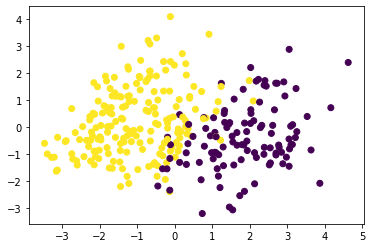

In [44]:
gmm = GaussianMixture(n_components=2, random_state=200, covariance_type='tied')

y_preds = gmm.fit_predict(X_std)

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds)
plt.show()

In [41]:
print('ARI score: {}'.format(metrics.adjusted_rand_score(y,y_preds)))
print('Silhouette score: {}'.format(metrics.silhouette_score(X_std,y_preds)))

ARI score: 0.4207322145049338
Silhouette score: 0.16118591340148433


The ARI score and Silhouette score were higher than the hierarchical models, but lower than the K_means model

# 2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

- full: This is the default. Each component has its own general covariance matrix.
- tied: All components share the same general covariance matrix.
- diag: Each component has its own diagonal covariance matrix.
- spherical: Each component has its own single variance.<br>
<br>
Try all of these. Which one does perform better in terms of ARI and silhouette scores?

In [43]:
gmm = GaussianMixture(n_components=2, random_state=200, covariance_type='full')

y_preds = gmm.fit_predict(X_std)

print('ARI score (FULL): {}'.format(metrics.adjusted_rand_score(y,y_preds)))
print('Silhouette score (FULL): {}'.format(metrics.silhouette_score(X_std,y_preds)))
print('----------------------')

gmm = GaussianMixture(n_components=2, random_state=200, covariance_type='tied')

y_preds = gmm.fit_predict(X_std)

print('ARI score (TIED): {}'.format(metrics.adjusted_rand_score(y,y_preds)))
print('Silhouette score (TIED): {}'.format(metrics.silhouette_score(X_std,y_preds)))
print('----------------------')

gmm = GaussianMixture(n_components=2, random_state=200, covariance_type='diag')

y_preds = gmm.fit_predict(X_std)

print('ARI score (DIAG): {}'.format(metrics.adjusted_rand_score(y,y_preds)))
print('Silhouette score (DIAG): {}'.format(metrics.silhouette_score(X_std,y_preds)))
print('----------------------')

gmm = GaussianMixture(n_components=2, random_state=200, covariance_type='spherical')

y_preds = gmm.fit_predict(X_std)

print('ARI score (SPHERICAL): {}'.format(metrics.adjusted_rand_score(y,y_preds)))
print('Silhouette score (SPHERICAL): {}'.format(metrics.silhouette_score(X_std,y_preds)))

ARI score (FULL): 0.4207322145049338
Silhouette score (FULL): 0.16118591340148433
----------------------
ARI score (TIED): 0.4558104186161976
Silhouette score (TIED): 0.1671559472293439
----------------------
ARI score (DIAG): 0.37878842718089933
Silhouette score (DIAG): 0.15836933745078682
----------------------
ARI score (SPHERICAL): 0.20765243525722465
Silhouette score (SPHERICAL): 0.12468753110276873


Covariance type of 'tied' has the highest ARI score and highest silhouette score.

# ask mukesh - What does covariance type mean?